<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/PH_data_analysis_using_sarima_arima_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from pandas import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
df=pd.read_csv('PH.csv')

In [3]:
df.head()

,created_at,PH
0,2022-03-27T15:07:07+00:00,7.11
1,2022-03-27T15:07:34+00:00,7.13
2,2022-03-27T15:07:53+00:00,7.13
3,2022-03-27T15:08:24+00:00,7.15
4,2022-03-27T15:08:40+00:00,7.14


In [4]:
df.tail()

,created_at,PH
60164,2022-04-12T18:10:02+00:00,7.49
60165,2022-04-12T18:10:18+00:00,7.50
60166,2022-04-12T18:10:34+00:00,7.50
60167,2022-04-12T18:10:50+00:00,7.52
60168,2022-04-12T18:11:06+00:00,7.50


In [6]:
df.colunms=["created_at	","PH"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,PH
0,2022-03-27T15:07:07+00:00,7.11
1,2022-03-27T15:07:34+00:00,7.13
2,2022-03-27T15:07:53+00:00,7.13
3,2022-03-27T15:08:24+00:00,7.15
4,2022-03-27T15:08:40+00:00,7.14


In [7]:
df.tail()

,created_at,PH
60164,2022-04-12T18:10:02+00:00,7.49
60165,2022-04-12T18:10:18+00:00,7.50
60166,2022-04-12T18:10:34+00:00,7.50
60167,2022-04-12T18:10:50+00:00,7.52
60168,2022-04-12T18:11:06+00:00,7.50


In [8]:
df['created_at']=pd.to_datetime(df["created_at"])

In [9]:
df.set_index("created_at",inplace=True)

In [10]:
df.head()

,PH
created_at,
2022-03-27 15:07:07+00:00,7.11
2022-03-27 15:07:34+00:00,7.13
2022-03-27 15:07:53+00:00,7.13
2022-03-27 15:08:24+00:00,7.15
2022-03-27 15:08:40+00:00,7.14


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PH,60169.0,6.974127,1.634548,0.02,7.33,7.47,7.54,10.91


In [12]:
df.isnull().sum()

PH    0
dtype: int64

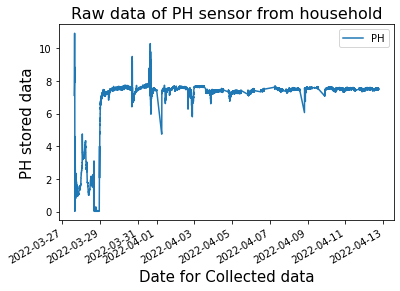

In [14]:
df.plot()
plt.title("Raw data of PH sensor from household", fontsize=16)
plt.ylabel("PH stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


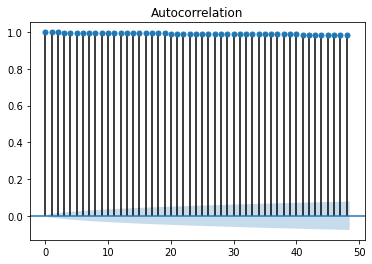

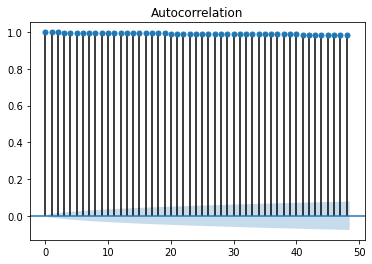

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [16]:
df.head()

,PH
created_at,
2022-03-27 15:07:07+00:00,7.11
2022-03-27 15:07:34+00:00,7.13
2022-03-27 15:07:53+00:00,7.13
2022-03-27 15:08:24+00:00,7.15
2022-03-27 15:08:40+00:00,7.14


In [17]:
df.shift(1)

,PH
created_at,
2022-03-27 15:07:07+00:00,NaN
2022-03-27 15:07:34+00:00,7.11
2022-03-27 15:07:53+00:00,7.13
2022-03-27 15:08:24+00:00,7.13
2022-03-27 15:08:40+00:00,7.15
...,...
2022-04-12 18:10:02+00:00,7.51
2022-04-12 18:10:18+00:00,7.49
2022-04-12 18:10:34+00:00,7.50


In [18]:
df_diff = df.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

In [19]:
df_diff = df_diff[1:]
df_diff.head()

,PH
created_at,
2022-03-27 15:07:34+00:00,0.02
2022-03-27 15:07:53+00:00,0.00
2022-03-27 15:08:24+00:00,0.02
2022-03-27 15:08:40+00:00,-0.01
2022-03-27 15:21:48+00:00,0.41


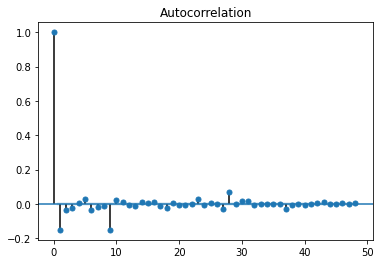

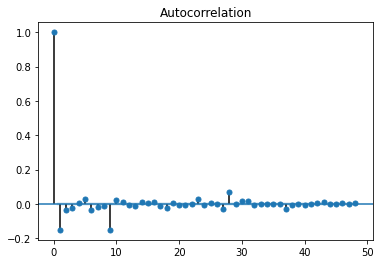

In [20]:
plot_acf(df_diff)

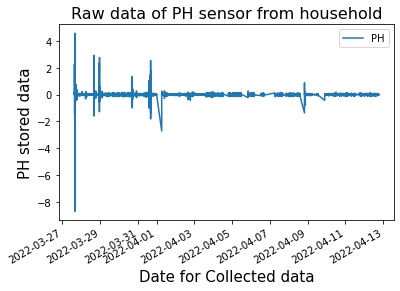

In [21]:
df_diff.plot()
plt.title("Raw data of PH sensor from household", fontsize=16)
plt.ylabel("PH stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()


Autoreggresive AR Model


In [73]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,df.shape)

(60169, 1)
(60139, 1) (60169, 1)


In [74]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['PH'],order=(3,1,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.PH   No. Observations:                60138
Model:                 ARIMA(3, 1, 2)   Log Likelihood               80883.246
Method:                       css-mle   S.D. of innovations              0.063
Date:                Wed, 22 Jun 2022   AIC                        -161752.492
Time:                        04:10:44   BIC                        -161689.462
Sample:                             1   HQIC                       -161732.916
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.402e-06      0.000     -0.046      0.963      -0.000       0.000
ar.L1.D.PH     0.7780      0.099      7.851      0.000       0.584       0.972
ar.L2.D.PH     0.0554      0.074      0.753      0.451      -0.089       0.200
ar.L3.D.PH     0.0172      0.010      1.724      0.085      -0.002       0.037
ma.L1.D.PH    -0.9477      0.099     -9.569      0.000      -1.142      -0.754
ma.L2.D.PH     0.0281      0.090      0.312      0.755      -0.148       0.205
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1560           -0.0000j            1.1560           -0.0000
AR.2           -2.1841           -6.7371j            7.0823           -0.2999
AR.3           -2.1841           +6.7371j            7.0823            0.2999
MA.1            1.0905           +0.0000j            1.0905            0.0000
MA.2           32.6495           +0.0000j           32.6495            0.0000
-----------------------------------------------------------------------------
"""

In [108]:

predictions=model.predict(start=35000,end=60100,typ='levels').rename('ARIMA Predictions')


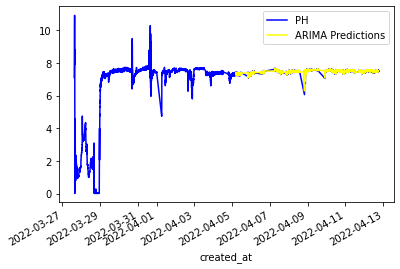

In [112]:
df.plot(legend=True, color="blue")
predictions.plot(legend=True,color='yellow')

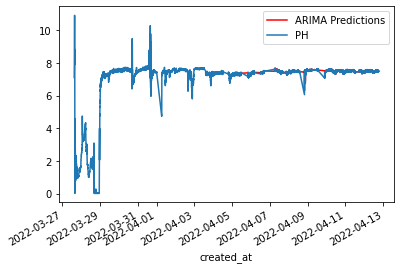

In [113]:
predictions.plot(legend=True,color='red')
df['PH'].plot(legend=True)

In [114]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['PH'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa690ef87a0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [121]:
mean_squared_error(test,pred)

0.00044193306593024335

In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['PH'].mean()
rmse=sqrt(mean_squared_error(pred,test['PH']))
print(rmse)

0.021022204116843773


In [117]:
predictions = model.predict(start=46000,end=60100)

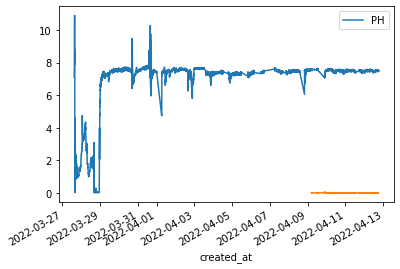

In [118]:
df.plot()
predictions.plot()

In [93]:
predictions= model.forecast(steps=1000)[0]
predictions

array([7.49169559, 7.49238429, 7.49301305, 7.49356864, 7.49404662,
       7.49445913, 7.49481515, 7.49512226, 7.49538706, 7.49561527,
       7.49581181, 7.49598096, 7.49612642, 7.49625139, 7.49635863,
       7.49645053, 7.49652916, 7.49659632, 7.49665356, 7.4967022 ,
       7.49674342, 7.4967782 , 7.49680744, 7.49683186, 7.49685212,
       7.49686878, 7.49688233, 7.49689319, 7.49690172, 7.49690823,
       7.49691301, 7.49691627, 7.49691823, 7.49691906, 7.49691891,
       7.49691792, 7.4969162 , 7.49691385, 7.49691095, 7.49690758,
       7.4969038 , 7.49689966, 7.49689522, 7.49689052, 7.49688558,
       7.49688045, 7.49687515, 7.49686969, 7.49686411, 7.49685842,
       7.49685264, 7.49684677, 7.49684082, 7.49683482, 7.49682876,
       7.49682266, 7.49681651, 7.49681033, 7.49680413, 7.49679789,
       7.49679163, 7.49678535, 7.49677906, 7.49677275, 7.49676643,
       7.4967601 , 7.49675376, 7.49674741, 7.49674105, 7.49673469,
       7.49672832, 7.49672195, 7.49671557, 7.49670919, 7.49670

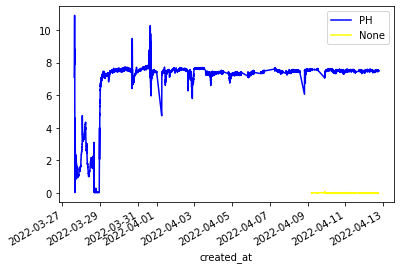

In [119]:
df.plot(legend=True, color="blue")
predictions.plot(legend=True,color='yellow')